<a href="https://colab.research.google.com/github/tsaijoy/JoyTsai/blob/main/%E3%80%90%E4%BD%9C%E6%A5%AD%E4%BA%8C%E3%80%9120250320_31%E5%A4%A93%E9%A4%90%E8%8A%B1%E8%B2%BB%E8%B3%87%E6%96%99%E9%95%B7%E6%A2%9D%E5%9C%96%E3%80%81%E6%8A%98%E7%B7%9A%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**我請ChatGPT隨機生成了虛假的31天3餐花費資料(畢竟3月有31天嘛^^)**


In [ ]:
from google.colab import auth #對google sheet做授權
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd #控制表單
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1MVKjpjnGR-N9RbR5xA_mXQUgDsYCcyMJY9FL8s7UYfk/edit?usp=sharing')

In [ ]:
from gspread_dataframe import set_with_dataframe

# 選擇要更新的工作表（選擇第一個工作表）要讀第一個工作表
worksheet = gsheets.get_worksheet(5)

In [ ]:
worksheet

<Worksheet 'W5' id:82471177>

In [ ]:
import pandas as pd

data = worksheet.get_all_values() #會以list的方式回傳 2D陣列

#將資料轉成DataFrame
df = pd.DataFrame(data)

df

,0,1,2,3
0,日期,早餐 (TWD),午餐 (TWD),晚餐 (TWD)
1,1,50,120,180
2,2,60,150,200
3,3,40,100,170
4,4,55,130,190
5,5,45,110,160
6,6,50,140,210
7,7,70,160,220
8,8,65,150,200
9,9,55,130,180


**下面是堆疊長條圖**

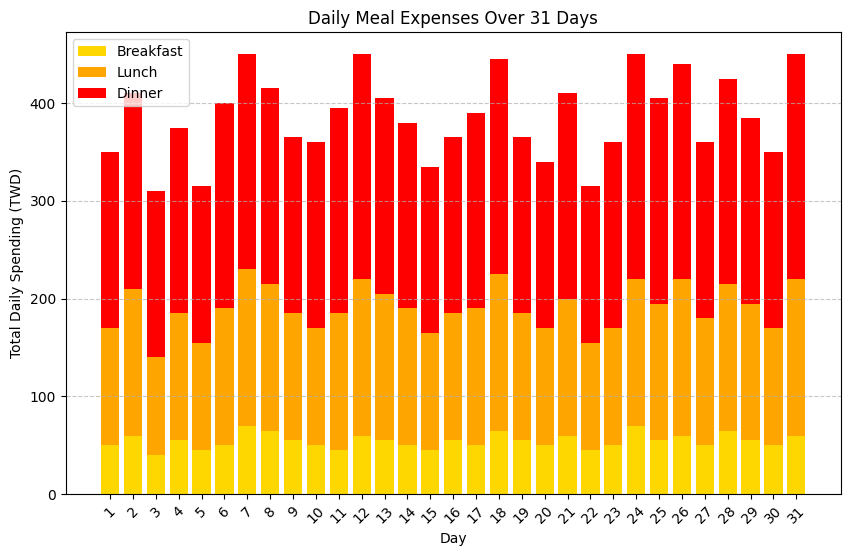

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 31 天的三餐花費數據
breakfast = np.array([50, 60, 40, 55, 45, 50, 70, 65, 55, 50, 45, 60, 55, 50, 45, 55, 50, 65, 55, 50, 60, 45, 50, 70, 55, 60, 50, 65, 55, 50, 60])
lunch = np.array([120, 150, 100, 130, 110, 140, 160, 150, 130, 120, 140, 160, 150, 140, 120, 130, 140, 160, 130, 120, 140, 110, 120, 150, 140, 160, 130, 150, 140, 120, 160])
dinner = np.array([180, 200, 170, 190, 160, 210, 220, 200, 180, 190, 210, 230, 200, 190, 170, 180, 200, 220, 180, 170, 210, 160, 190, 230, 210, 220, 180, 210, 190, 180, 230])

days = np.arange(1, 32)  # 1 到 31 天

plt.figure(figsize=(10, 6))  # 設置圖表大小
plt.bar(days, breakfast, label="Breakfast", color="gold")  # 早餐堆疊
plt.bar(days, lunch, bottom=breakfast, label="Lunch", color="orange")  # 午餐堆疊
plt.bar(days, dinner, bottom=breakfast + lunch, label="Dinner", color="red")  # 晚餐堆疊

plt.xlabel("Day")  # X 軸標籤
plt.ylabel("Total Daily Spending (TWD)")  # Y 軸標籤
plt.title("Daily Meal Expenses Over 31 Days")  # 圖表標題
plt.legend()  # 顯示圖例
plt.xticks(days, rotation=45)  # 旋轉 X 軸標籤以便閱讀
plt.grid(axis="y", linestyle="--", alpha=0.7)  # 添加網格線

plt.show()  # 顯示圖表

**下面是折線圖**

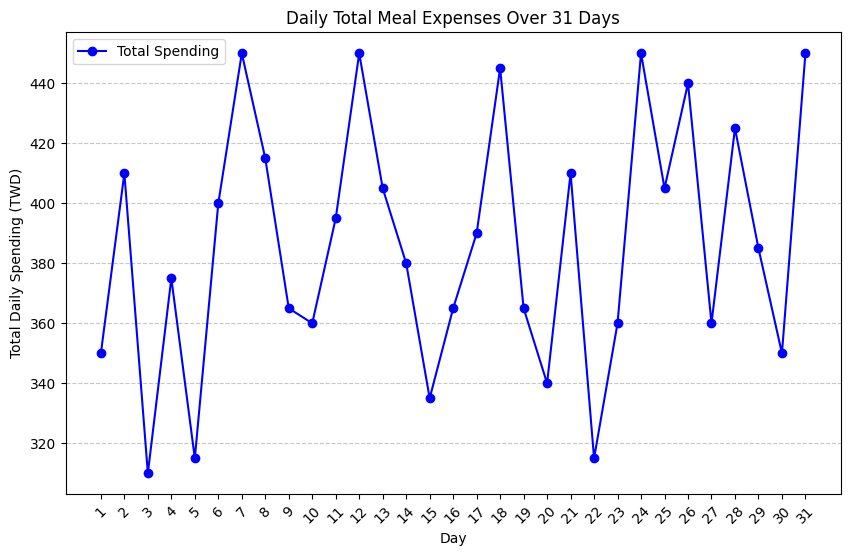

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 31 天的三餐花費數據
breakfast = np.array([50, 60, 40, 55, 45, 50, 70, 65, 55, 50, 45, 60, 55, 50, 45, 55, 50, 65, 55, 50, 60, 45, 50, 70, 55, 60, 50, 65, 55, 50, 60])
lunch = np.array([120, 150, 100, 130, 110, 140, 160, 150, 130, 120, 140, 160, 150, 140, 120, 130, 140, 160, 130, 120, 140, 110, 120, 150, 140, 160, 130, 150, 140, 120, 160])
dinner = np.array([180, 200, 170, 190, 160, 210, 220, 200, 180, 190, 210, 230, 200, 190, 170, 180, 200, 220, 180, 170, 210, 160, 190, 230, 210, 220, 180, 210, 190, 180, 230])

days = np.arange(1, 32)  # 1 到 31 天
total_spending = breakfast + lunch + dinner  # 計算每日總花費

plt.figure(figsize=(10, 6))  # 設置圖表大小
plt.plot(days, total_spending, marker='o', linestyle='-', color='b', label="Total Spending")  # 繪製折線圖

plt.xlabel("Day")  # X 軸標籤
plt.ylabel("Total Daily Spending (TWD)")  # Y 軸標籤
plt.title("Daily Total Meal Expenses Over 31 Days")  # 圖表標題
plt.legend()  # 顯示圖例
plt.xticks(days, rotation=45)  # 旋轉 X 軸標籤以便閱讀
plt.grid(axis="y", linestyle="--", alpha=0.7)  # 添加網格線

plt.show()  # 顯示圖表

**下面是早餐、午餐、晚餐總花費占比圓餅圖**

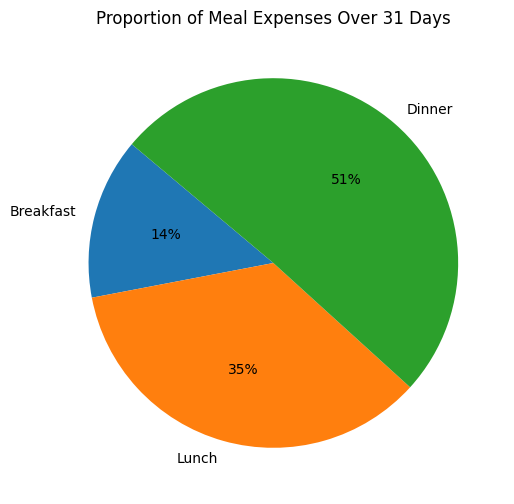

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 生成 31 天的三餐花費數據
breakfast = np.array([50, 60, 40, 55, 45, 50, 70, 65, 55, 50, 45, 60, 55, 50, 45, 55, 50, 65, 55, 50, 60, 45, 50, 70, 55, 60, 50, 65, 55, 50, 60])
lunch = np.array([120, 150, 100, 130, 110, 140, 160, 150, 130, 120, 140, 160, 150, 140, 120, 130, 140, 160, 130, 120, 140, 110, 120, 150, 140, 160, 130, 150, 140, 120, 160])
dinner = np.array([180, 200, 170, 190, 160, 210, 220, 200, 180, 190, 210, 230, 200, 190, 170, 180, 200, 220, 180, 170, 210, 160, 190, 230, 210, 220, 180, 210, 190, 180, 230])

# 計算總花費
breakfast_total = np.sum(breakfast)
lunch_total = np.sum(lunch)
dinner_total = np.sum(dinner)

# 建立 DataFrame
data = pd.Series([breakfast_total, lunch_total, dinner_total], index=["Breakfast", "Lunch", "Dinner"])

plt.figure(figsize=(10, 6))  # 設置圖表大小
plt.pie(data, labels=data.index, autopct=lambda p: f'{round(p)}%', startangle=140)
plt.title("Proportion of Meal Expenses Over 31 Days")  # 圖表標題
plt.show()  # 顯示圖表

